In [88]:
import pandas as pd
import numpy as np
from keras.layers import Dense
from keras.models import Sequential
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.preprocessing import Imputer
import numpy as np
from sklearn.cluster import KMeans


Import database de notas da Prova Brasil por município, e a database de dados dos municípios


In [10]:
notas = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\Notas.csv')
munic0 = pd.read_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\municipios\municipios20170101.csv')

Edição da Database munic


In [35]:
munic1 = munic0.drop(columns=['municipio','num_escolas_rurais','num_escolas_urbanas','num_estudantes_medio_4_serie','num_estudantes_medio_nao_seriada'])

In [30]:
info_reg = munic1[['regiao','unidade_federativa','mesoregiao','microregiao']]

In [36]:
munic2 = munic1.drop(columns=['regiao','unidade_federativa','mesoregiao','microregiao'])

Tem no munic e nao no notas : index: '4505'(Pescaria Brava), '4699'(Carlos Gomes), '5341'(Anhanguera)


In [57]:
munic3 = munic2[munic2.cod_municipio != 4212650]
munic3

,ano_censo,cod_municipio,num_escolas,num_escolas_em_atividade,num_estudantes_ensino_infantil,num_estudantes_ensino_fund_anos_iniciais,num_estudantes_ensino_fund_anos_finais,num_estudantes_ensino_medio_propedeutico,num_estudantes_fund_1_ano,num_estudantes_fund_2_ano,...,num_equip_fax,num_equip_foto,num_computador,num_comp_administrativo,num_comp_aluno,num_funcionarios,num_professores,num_matriculas,num_estudantes,num_turmas
0,2017,3519907,3,3,347,491,394,310,115,108,...,0,3,79,17,62,193,96,2176,1562,98
1,2017,3535507,41,35,2265,2765,2229,1580,562,513,...,5,51,511,141,336,1350,684,9777,9354,449
2,2017,3535309,24,19,982,1371,1066,826,312,259,...,5,19,296,60,235,599,340,5435,4481,241
3,2017,3527900,2,2,162,212,136,128,47,37,...,0,4,33,7,13,100,52,903,665,48
4,2017,3507209,3,3,64,80,54,34,11,13,...,0,4,43,8,35,57,31,232,232,17
5,2017,3504008,77,69,5006,6253,4832,3435,1265,1276,...,22,113,810,231,583,2940,1490,24550,21596,1080
6,2017,3553955,10,10,983,1145,818,507,240,239,...,1,14,195,46,155,462,262,4073,3613,168
7,2017,3519501,6,5,321,405,340,204,78,77,...,1,5,24,8,16,159,62,1401,1298,68
8,2017,3513306,5,3,106,105,77,73,18,18,...,1,4,22,11,11,80,43,462,392,26
9,2017,3532157,3,3,160,187,145,131,45,47,...,0,2,21,10,12,91,48,799,668,40


In [56]:
munic4 = munic3[munic3.cod_municipio != 4304853]
munic4

,ano_censo,cod_municipio,num_escolas,num_escolas_em_atividade,num_estudantes_ensino_infantil,num_estudantes_ensino_fund_anos_iniciais,num_estudantes_ensino_fund_anos_finais,num_estudantes_ensino_medio_propedeutico,num_estudantes_fund_1_ano,num_estudantes_fund_2_ano,...,num_equip_fax,num_equip_foto,num_computador,num_comp_administrativo,num_comp_aluno,num_funcionarios,num_professores,num_matriculas,num_estudantes,num_turmas
0,2017,3519907,3,3,347,491,394,310,115,108,...,0,3,79,17,62,193,96,2176,1562,98
1,2017,3535507,41,35,2265,2765,2229,1580,562,513,...,5,51,511,141,336,1350,684,9777,9354,449
2,2017,3535309,24,19,982,1371,1066,826,312,259,...,5,19,296,60,235,599,340,5435,4481,241
3,2017,3527900,2,2,162,212,136,128,47,37,...,0,4,33,7,13,100,52,903,665,48
4,2017,3507209,3,3,64,80,54,34,11,13,...,0,4,43,8,35,57,31,232,232,17
5,2017,3504008,77,69,5006,6253,4832,3435,1265,1276,...,22,113,810,231,583,2940,1490,24550,21596,1080
6,2017,3553955,10,10,983,1145,818,507,240,239,...,1,14,195,46,155,462,262,4073,3613,168
7,2017,3519501,6,5,321,405,340,204,78,77,...,1,5,24,8,16,159,62,1401,1298,68
8,2017,3513306,5,3,106,105,77,73,18,18,...,1,4,22,11,11,80,43,462,392,26
9,2017,3532157,3,3,160,187,145,131,45,47,...,0,2,21,10,12,91,48,799,668,40


In [58]:
munic5 = munic4[munic4.cod_municipio != 5201207]
munic5

,ano_censo,cod_municipio,num_escolas,num_escolas_em_atividade,num_estudantes_ensino_infantil,num_estudantes_ensino_fund_anos_iniciais,num_estudantes_ensino_fund_anos_finais,num_estudantes_ensino_medio_propedeutico,num_estudantes_fund_1_ano,num_estudantes_fund_2_ano,...,num_equip_fax,num_equip_foto,num_computador,num_comp_administrativo,num_comp_aluno,num_funcionarios,num_professores,num_matriculas,num_estudantes,num_turmas
0,2017,3519907,3,3,347,491,394,310,115,108,...,0,3,79,17,62,193,96,2176,1562,98
1,2017,3535507,41,35,2265,2765,2229,1580,562,513,...,5,51,511,141,336,1350,684,9777,9354,449
2,2017,3535309,24,19,982,1371,1066,826,312,259,...,5,19,296,60,235,599,340,5435,4481,241
3,2017,3527900,2,2,162,212,136,128,47,37,...,0,4,33,7,13,100,52,903,665,48
4,2017,3507209,3,3,64,80,54,34,11,13,...,0,4,43,8,35,57,31,232,232,17
5,2017,3504008,77,69,5006,6253,4832,3435,1265,1276,...,22,113,810,231,583,2940,1490,24550,21596,1080
6,2017,3553955,10,10,983,1145,818,507,240,239,...,1,14,195,46,155,462,262,4073,3613,168
7,2017,3519501,6,5,321,405,340,204,78,77,...,1,5,24,8,16,159,62,1401,1298,68
8,2017,3513306,5,3,106,105,77,73,18,18,...,1,4,22,11,11,80,43,462,392,26
9,2017,3532157,3,3,160,187,145,131,45,47,...,0,2,21,10,12,91,48,799,668,40


In [61]:
munic5['Ideb2017'] = notas.loc[:,'NotaProvaBrasil_NotaMedia_2017']

C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


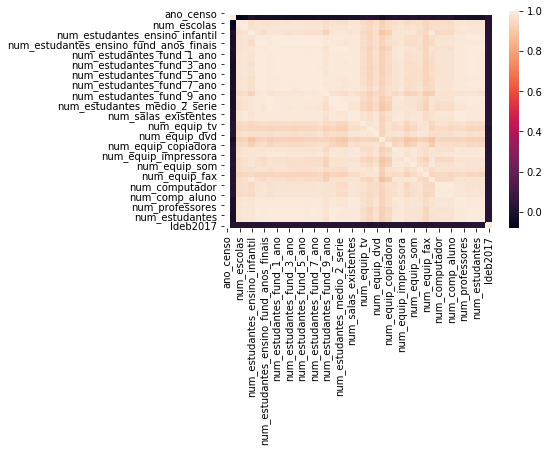

In [65]:
sns.heatmap(munic5.corr())

munic5.head()

Reduzir dimensões para ser possivel plotar as features em 2D

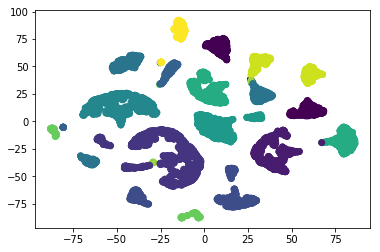

In [134]:
model = TSNE(learning_rate=200)
transf = model.fit_transform(munic6)
xs = transf[:,0]
ys = transf[:,1]
plt.scatter(xs,ys,c=labels)

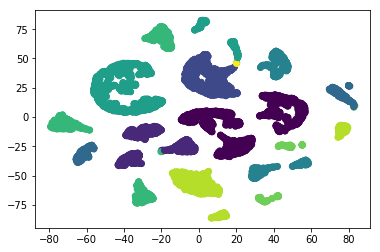

In [101]:
plt.scatter(xs,ys,c=labels)

In [84]:
munic5.to_csv(r'C:\Users\Filipe Prates\Documents\Projects\Datasets\BCG Challenge\original\munic5.csv')

Criando Imputer para lidar com valores 'NaN'

In [86]:
imp = Imputer(missing_values=np.nan,strategy = 'mean',axis=0)
imp.fit(munic5)
munic6 = imp.transform(munic5)

C:\Users\Filipe Prates\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


Tentando diferentes números de clusters no KMeans

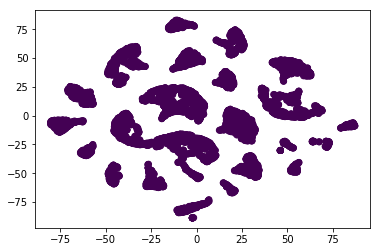

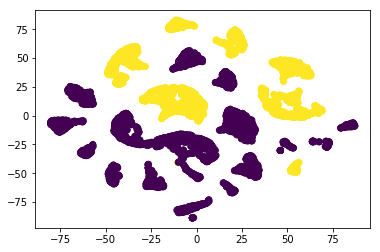

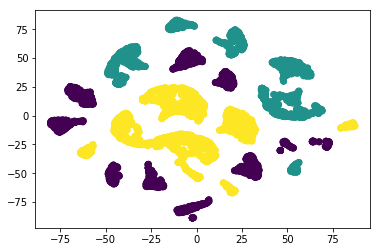

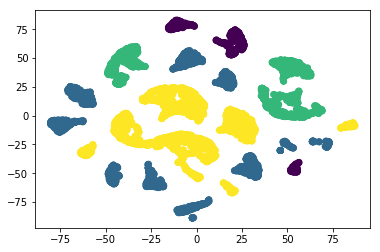

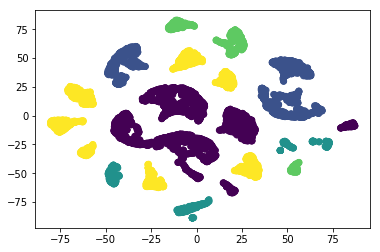

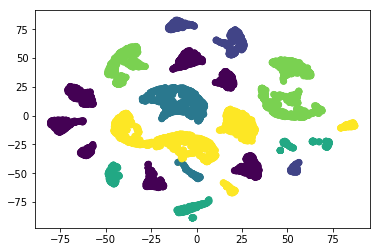

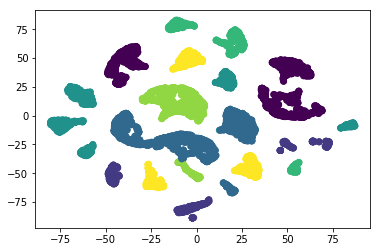

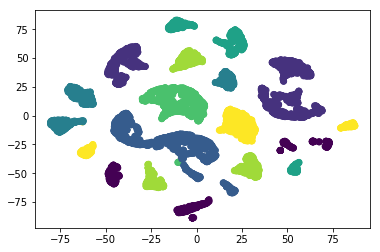

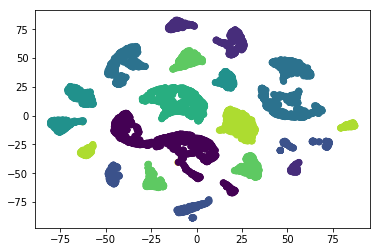

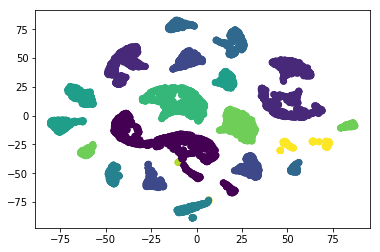

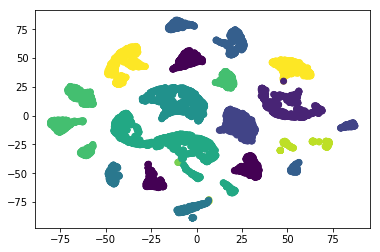

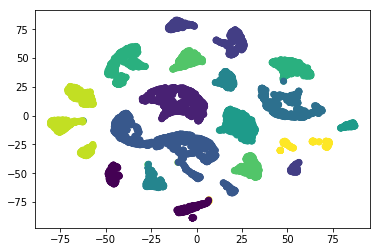

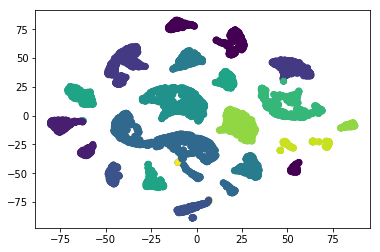

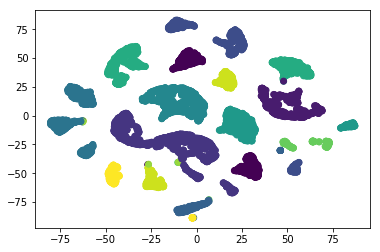

In [125]:
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(munic6)
    labels = model.predict(munic6)
    plt.scatter(xs,ys,c=labels)
    plt.show()

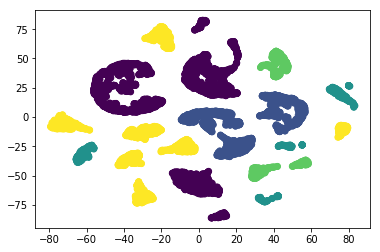

In [105]:
model = KMeans(n_clusters=5)
model.fit(munic6)
labels = model.predict(munic6)
plt.scatter(xs,ys,c=labels)
plt.show()

Os dados parecem estar separados em grupos, fazer um KMeans com diferentes numeros de clusters e ver qual bate melhor com o observado

In [106]:
model.cluster_centers_

array([[2.01700000e+03, 3.20940572e+06, 5.65509259e+01, 3.72754630e+01,
        2.01347963e+03, 3.31635417e+03, 2.59180463e+03, 1.84800833e+03,
        6.32372222e+02, 6.35563426e+02, 7.04912500e+02, 6.77961111e+02,
        6.65552315e+02, 7.08818519e+02, 6.75449537e+02, 6.30194444e+02,
        5.77385185e+02, 6.75925000e+02, 5.61316667e+02, 4.95816204e+02,
        3.40140741e+02, 3.24214815e+02, 9.62629630e+01, 9.65879630e+00,
        6.74407407e+01, 9.67175926e+00, 3.09407407e+01, 1.83819444e+01,
        6.92398148e+01, 4.13930556e+01, 9.13587963e+01, 6.52953704e+01,
        8.65787037e+00, 3.86064815e+01, 4.28580556e+02, 1.33015741e+02,
        2.76757870e+02, 1.31657037e+03, 6.15777315e+02, 1.17696421e+04,
        1.07426329e+04, 5.36745370e+02, 5.05994237e+00],
       [2.01700000e+03, 4.22038746e+06, 2.96299411e+01, 2.19756098e+01,
        1.04241043e+03, 1.65033389e+03, 1.38158873e+03, 8.48447435e+02,
        3.18179983e+02, 3.15225399e+02, 3.49491169e+02, 3.30580320e+02,
       

In [131]:
cc = (munic5.columns,model.cluster_centers_)
cc

(Index(['ano_censo', 'cod_municipio', 'num_escolas', 'num_escolas_em_atividade',
        'num_estudantes_ensino_infantil',
        'num_estudantes_ensino_fund_anos_iniciais',
        'num_estudantes_ensino_fund_anos_finais',
        'num_estudantes_ensino_medio_propedeutico', 'num_estudantes_fund_1_ano',
        'num_estudantes_fund_2_ano', 'num_estudantes_fund_3_ano',
        'num_estudantes_fund_4_ano', 'num_estudantes_fund_5_ano',
        'num_estudantes_fund_6_ano', 'num_estudantes_fund_7_ano',
        'num_estudantes_fund_8_ano', 'num_estudantes_fund_9_ano',
        'num_estudantes_medio_1_serie', 'num_estudantes_medio_2_serie',
        'num_estudantes_medio_3_serie', 'num_salas_existentes',
        'num_salas_utilizadas', 'num_equip_tv', 'num_equip_videocassete',
        'num_equip_dvd', 'num_equip_parabolica', 'num_equip_copiadora',
        'num_equip_retroprojetor', 'num_equip_impressora',
        'num_equip_impressora_mult', 'num_equip_som', 'num_equip_multimidia',
        'nu

Todos os centroides tao com idebs parecidos [5,06;5,20;5,09;4,91;5,00] entao vou acrescentar os ideb dos anos anteriores para influenciar mais na clusterizacao


In [113]:
munic7 = munic5
munic7['NPB_2015'] = notas['NotaProvaBrasil_NotaMedia_2015']
munic7['NPB_2013'] = notas['NotaProvaBrasil_NotaMedia_2013']
munic7['NPB_2011'] = notas['NotaProvaBrasil_NotaMedia_2011']
munic7['NPB_2009'] = notas['NotaProvaBrasil_NotaMedia_2009']


C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Filipe Prates\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

Mesmo processo

In [117]:
imp = Imputer(missing_values=np.nan,strategy = 'mean',axis=0)
imp.fit(munic7)
munic8 = imp.transform(munic7)

C:\Users\Filipe Prates\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [118]:
model = TSNE(learning_rate=100)
transf = model.fit_transform(munic8)
xs = transf[:,0]
ys = transf[:,1]

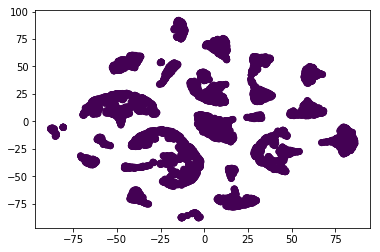

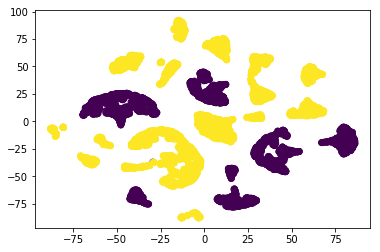

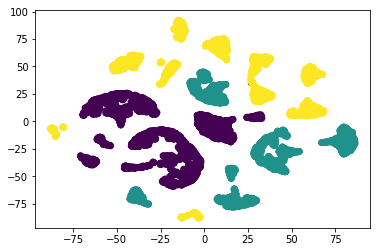

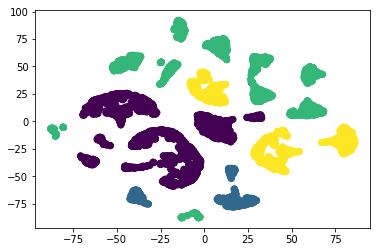

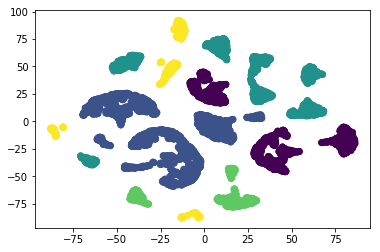

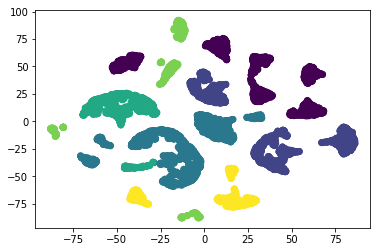

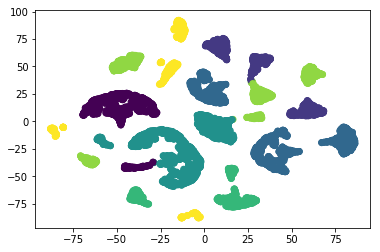

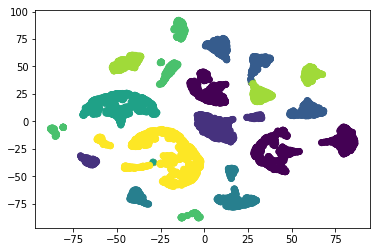

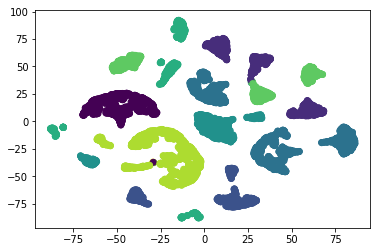

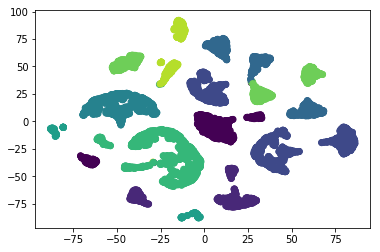

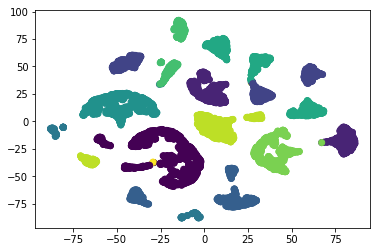

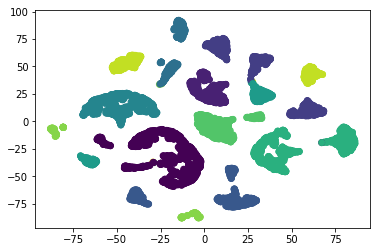

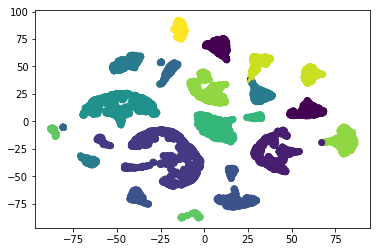

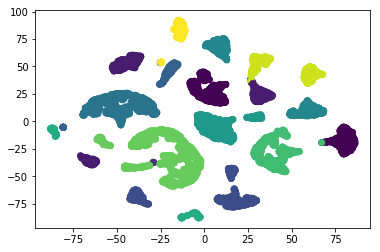

In [135]:
for i in range(1,15):
    model = KMeans(n_clusters=i)
    model.fit(munic8)
    labels = model.predict(munic8)
    plt.scatter(xs,ys,c=labels)
    plt.show()

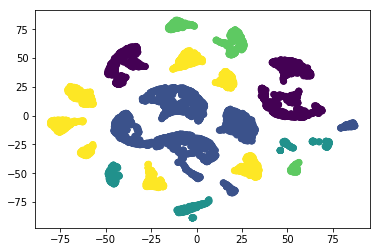

In [123]:
model = KMeans(n_clusters=5)
model.fit(munic8)
labels = model.predict(munic8)
plt.scatter(xs,ys,c=labels)
plt.show()

Os samples do Dataset (os municípios) parecem estar separados em grupos distintos no espaço 42-dimensional das features que aparecem na database fornecida. Visualizamos esse fato pois ao mapearmos nas 2 dimensões que melhor preservam as distancias, os samples se separam em grupos facilmente clusterizaveis por KMeans.

Apos tentar com diversos numero de clusters, podemos interpretar que a forma com que os dados estão jogados no espaço pode ser simplificada como 5 grandes grupos, seriam grupos de municipios que tem características educacionais similiares entre si, e provavelmente notas no ideb similares entre si.

Tentaremos entender qual são os municípios mais característicos de cada grupo vendo os centroides dos mesmos

In [122]:
cc = (munic7.columns,model.cluster_centers_)
cc

(Index(['ano_censo', 'cod_municipio', 'num_escolas', 'num_escolas_em_atividade',
        'num_estudantes_ensino_infantil',
        'num_estudantes_ensino_fund_anos_iniciais',
        'num_estudantes_ensino_fund_anos_finais',
        'num_estudantes_ensino_medio_propedeutico', 'num_estudantes_fund_1_ano',
        'num_estudantes_fund_2_ano', 'num_estudantes_fund_3_ano',
        'num_estudantes_fund_4_ano', 'num_estudantes_fund_5_ano',
        'num_estudantes_fund_6_ano', 'num_estudantes_fund_7_ano',
        'num_estudantes_fund_8_ano', 'num_estudantes_fund_9_ano',
        'num_estudantes_medio_1_serie', 'num_estudantes_medio_2_serie',
        'num_estudantes_medio_3_serie', 'num_salas_existentes',
        'num_salas_utilizadas', 'num_equip_tv', 'num_equip_videocassete',
        'num_equip_dvd', 'num_equip_parabolica', 'num_equip_copiadora',
        'num_equip_retroprojetor', 'num_equip_impressora',
        'num_equip_impressora_mult', 'num_equip_som', 'num_equip_multimidia',
        'nu

Não foi possível entender exatamente quais seriam os clusters observando apenas os centroides, porem faz sentido se os 5 grupos sejam a representação no espaço das 5 regiões do brasil. Norte, Nordeste, Centro-Oeste, Sudeste e Sul. Teremos que ir mais profundo pra testas essa hipótese no futuro se caber

In [124]:
model.inertia_

230174622383878.88

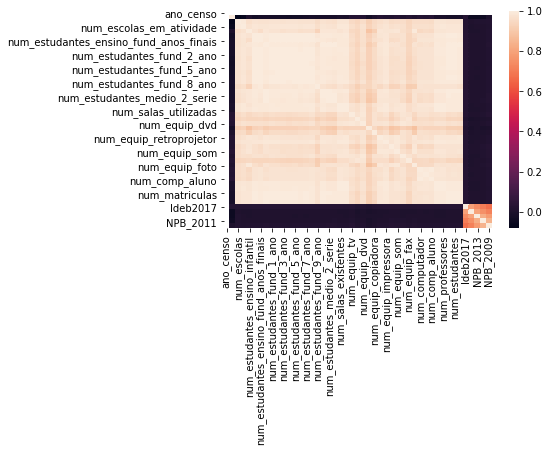

In [126]:
sns.heatmap(munic7.corr())